<a href="https://colab.research.google.com/github/sam445uutg/CIFAR10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt


In [2]:
df= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [15]:
(train_images,train_labels), (test_images, test_lables)= df

In [16]:
train_images, test_images = train_images/255.0, test_images/255.0
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


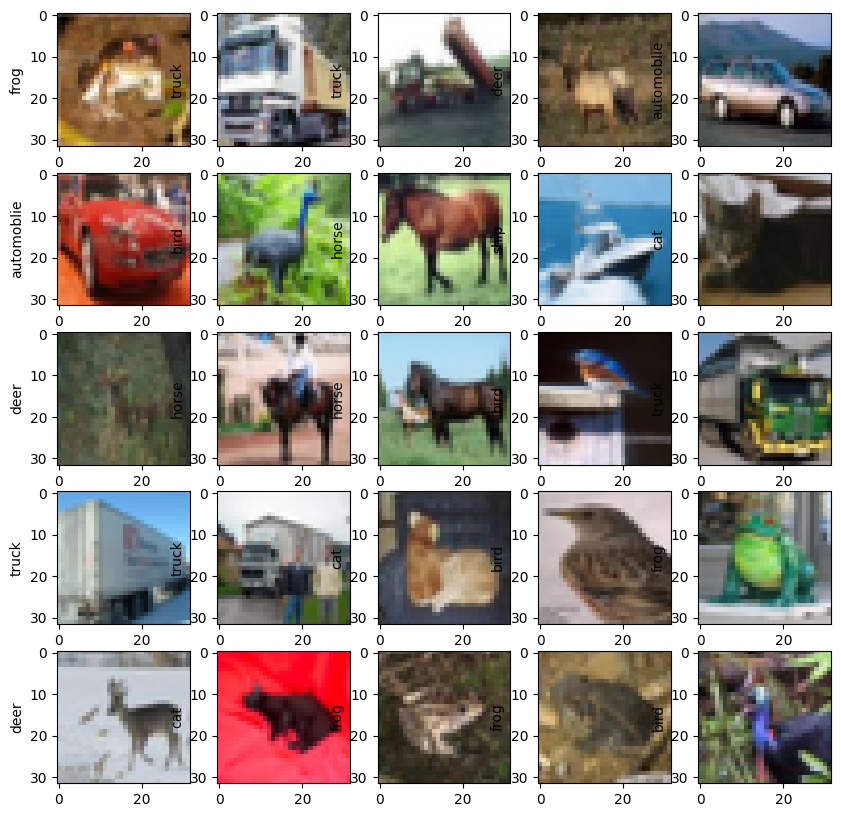

In [27]:
from numpy.ma import right_shift
from numpy.ma.core import left_shift
classname =["airplane","automoblie", "bird", 'cat', 'deer', 'dog', 'frog','horse','ship','truck' ]
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5, i+1)
  plt.xticks = ([])
  plt.yticks= ([])
  plt.grid(False)
  plt.imshow (train_images[i],cmap=plt.cm.binary)
  plt.ylabel(classname[train_labels[i][0]])

plt.show()

In [28]:
model= models.Sequential()

In [29]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [32]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
mod = model.fit(x=train_images,y=train_labels,
                batch_size=100,
                epochs=10,
                validation_data=(test_images,test_lables))

Epoch 1/10
500/500 [==============================] - 78s 154ms/step - loss: 1.0047 - val_loss: 1.0304
Epoch 2/10
500/500 [==============================] - 78s 157ms/step - loss: 0.9405 - val_loss: 0.9755
Epoch 3/10
500/500 [==============================] - 77s 154ms/step - loss: 0.8891 - val_loss: 0.9331
Epoch 4/10
500/500 [==============================] - 107s 213ms/step - loss: 0.8389 - val_loss: 0.9527
Epoch 5/10
500/500 [==============================] - 129s 258ms/step - loss: 0.7964 - val_loss: 0.9365
Epoch 6/10
500/500 [==============================] - 138s 277ms/step - loss: 0.7565 - val_loss: 0.8751
Epoch 7/10
500/500 [==============================] - 110s 219ms/step - loss: 0.7174 - val_loss: 0.8799
Epoch 8/10
500/500 [==============================] - 77s 154ms/step - loss: 0.6872 - val_loss: 0.8572
Epoch 9/10
500/500 [==============================] - 79s 159ms/step - loss: 0.6599 - val_loss: 0.8521
Epoch 10/10
500/500 [==============================] - 76s 151ms/step

<function matplotlib.pyplot.show(close=None, block=None)>

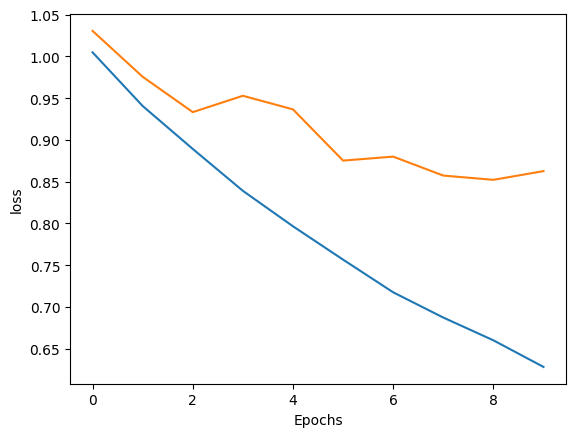

In [36]:
plt.plot(mod.history['loss'],label='losses')
plt.plot(mod.history['val_loss'],label='val,Loses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show